<a href="https://colab.research.google.com/github/254-KIPSANG/EDA--PYTHON/blob/main/project_proposal_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import pandas as pd
#mount dataframe to drive

breast_df = pd.read_csv('/content/drive/MyDrive/PROPOSALS/Breast_GSE45827.csv')

# Print the head of the DataFrame
print(breast_df.head())


   samples   type  1007_s_at   1053_at    117_at    121_at  1255_g_at  \
0       84  basal   9.850040  8.097927  6.424728  7.353027   3.029122   
1       85  basal   9.861357  8.212222  7.062593  7.685578   3.149468   
2       87  basal  10.103478  8.936137  5.735970  7.687822   3.125931   
3       90  basal   9.756875  7.357148  6.479183  6.986624   3.181638   
4       91  basal   9.408330  7.746404  6.693980  7.333426   3.169923   

    1294_at   1316_at   1320_at  ...  AFFX-r2-Ec-bioD-3_at  \
0  6.880079  4.963740  4.408328  ...             12.229711   
1  7.542283  5.129607  4.584418  ...             12.178531   
2  6.562369  4.813449  4.425195  ...             12.125108   
3  7.802344  5.490982  4.567956  ...             12.111235   
4  7.610457  5.372469  4.424426  ...             12.173642   

   AFFX-r2-Ec-bioD-5_at  AFFX-r2-P1-cre-3_at  AFFX-r2-P1-cre-5_at  \
0             11.852955            13.658701            13.477698   
1             11.809408            13.750086      

In [4]:
# Display the basic information about the DataFrame
print(breast_df.info())

# Summary statistics of numerical columns
print(breast_df.describe())

# Check for any missing values
print(breast_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Columns: 54677 entries, samples to AFFX-TrpnX-M_at
dtypes: float64(54675), int64(1), object(1)
memory usage: 63.0+ MB
None
          samples   1007_s_at     1053_at      117_at      121_at   1255_g_at  \
count  151.000000  151.000000  151.000000  151.000000  151.000000  151.000000   
mean   160.668874   10.338901    7.631910    6.224885    7.339248    3.185252   
std     45.431226    0.613445    0.706464    0.645435    0.330827    0.158909   
min     84.000000    7.505488    5.855968    4.763602    6.632206    2.760583   
25%    121.500000   10.103030    7.166075    5.798087    7.105841    3.075873   
50%    159.000000   10.416819    7.531673    6.235074    7.333426    3.187703   
75%    200.500000   10.735117    8.053832    6.612291    7.513084    3.280416   
max    238.000000   11.675109    9.627008    8.364749    8.374055    3.611630   

          1294_at     1316_at     1320_at   1405_i_at  ...  \
count  151.00

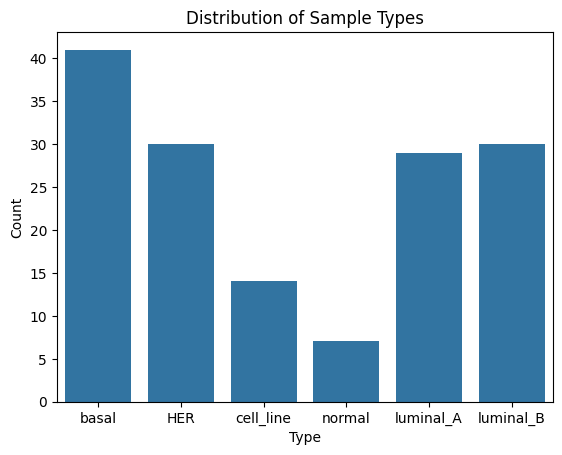

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of sample types
sns.countplot(x='type', data=breast_df)
plt.title('Distribution of Sample Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

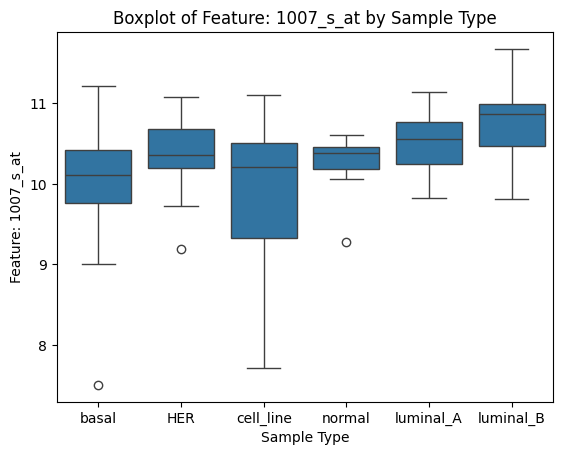

In [9]:
# Boxplot of a numerical feature (e.g., '1007_s_at') by sample type
sns.boxplot(x='type', y='1007_s_at', data=breast_df)
plt.title('Boxplot of Feature: 1007_s_at by Sample Type')
plt.xlabel('Sample Type')
plt.ylabel('Feature: 1007_s_at')
plt.show()

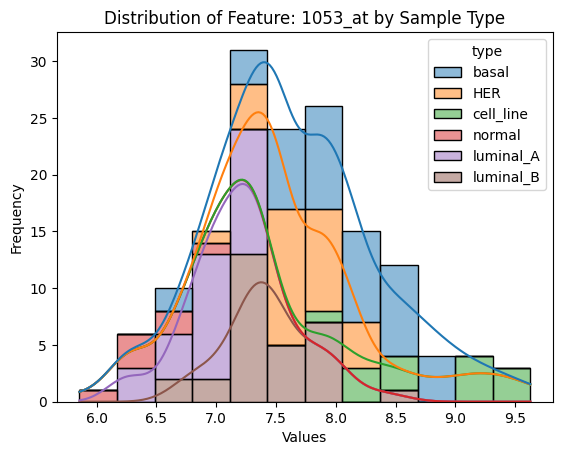

In [10]:
# Histogram of a numerical feature (e.g., '1053_at') by sample type
sns.histplot(data=breast_df, x='1053_at', hue='type', kde=True, multiple="stack")
plt.title('Distribution of Feature: 1053_at by Sample Type')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Count the occurrences of each sample type
sample_type_counts = breast_df['type'].value_counts()

# Create a DataFrame to represent the distribution of sample types
sample_type_df = pd.DataFrame(sample_type_counts).reset_index()
sample_type_df.columns = ['Sample Type', 'Count']

print("Distribution of Sample Types:")
print(sample_type_df)


Distribution of Sample Types:
  Sample Type  Count
0       basal     41
1         HER     30
2   luminal_B     30
3   luminal_A     29
4   cell_line     14
5      normal      7


In [14]:
# # Calculate summary statistics (mean, std, min, 25%, 50%, 75%, max) for numerical features by sample type
# summary_statistics = breast_df.groupby('type').describe().stack().reset_index()

# # Filter only relevant columns and rename them
# summary_statistics = summary_statistics[['type', 'level_1', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
# summary_statistics.columns = ['Sample Type', 'Feature', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']

# print("\nSummary Statistics of Numerical Features by Sample Type:")
# print(summary_statistics)


**categorize the sample types into two groups: "cell_line" and "non_cell_line**

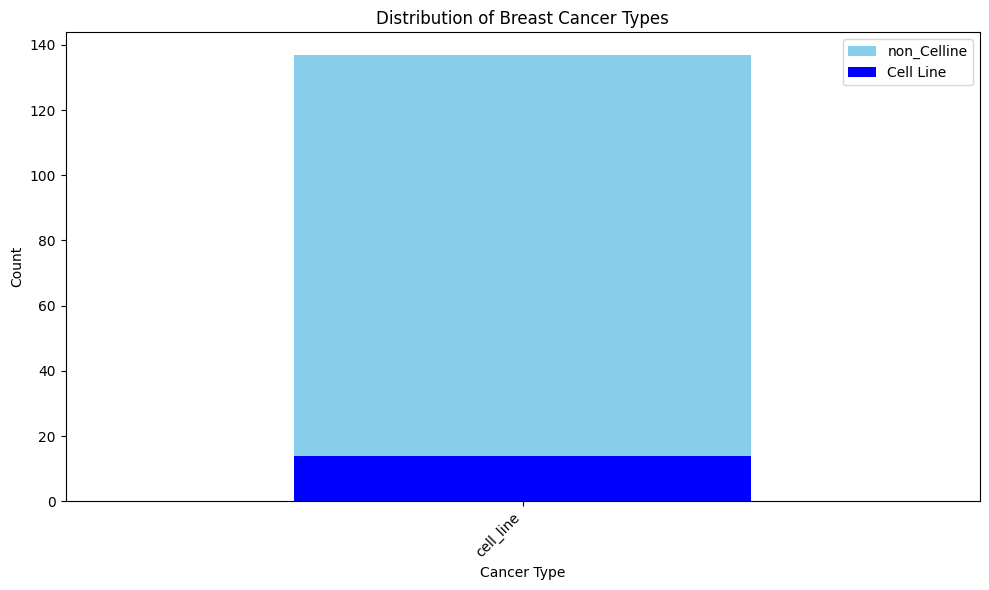

In [23]:
import matplotlib.pyplot as plt

# Rename non-'cell_line' categories to 'non_Celline'
breast_df.loc[breast_df['type'] != 'cell_line', 'type'] = 'non_Celline'

# Count the occurrences of each type
type_counts = breast_df['type'].value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))

# Plot all types except 'cell_line' with the same color
type_counts[type_counts.index != 'cell_line'].plot(kind='bar', color='skyblue', label='non_Celline')

# Plot 'cell_line' type with a different color
type_counts[type_counts.index == 'cell_line'].plot(kind='bar', color='blue', label='Cell Line')

plt.title('Distribution of Breast Cancer Types')
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()
